<a href="https://colab.research.google.com/github/surajkm12/25MML0047_SURAJ_KM_MACSE604_EDGE_INTELLIGENCE/blob/main/DL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Instead of float conversion → use reshape (flatten manually)
x_train = x_train.reshape(-1, 28, 28)
x_test = x_test.reshape(-1, 28, 28)

# Build model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   # flatten layer
    keras.layers.Dense(1028, activation='relu'),   # hidden layer
    keras.layers.Dense(10, activation='softmax')  # output layer
])

model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1028)           │       806,980 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 817,270 (3.12 MB)

 Trainable params: 817,270 (3.12 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9370 - loss: 0.2366
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9460 - loss: 0.1963
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9540 - loss: 0.1650
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9598 - loss: 0.1426
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9637 - loss: 0.1306


In [ ]:
# Evaluate
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy:", acc)


Accuracy: 0.9448999762535095


In [ ]:
model.save("mnist.keras")

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1028)           │       806,980 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 817,272 (3.12 MB)

 Trainable params: 817,270 (3.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

MODEL SAVED!!

In [ ]:

# Predictions
pred_probs = model.predict(x_test[:5])
pred_labels = np.argmax(pred_probs, axis=1)

print("Predicted:", pred_labels)
print("Actual:   ", y_test[:5])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicted: [7 2 1 0 4]
Actual:    [7 2 1 0 4]


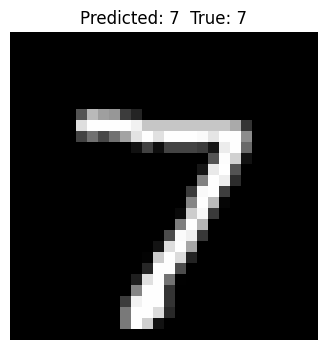

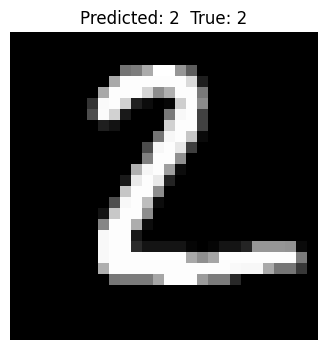

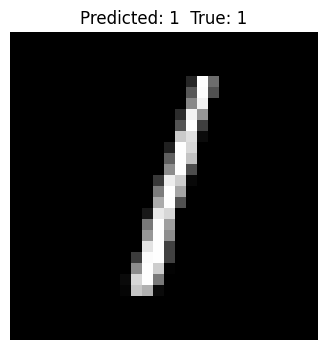

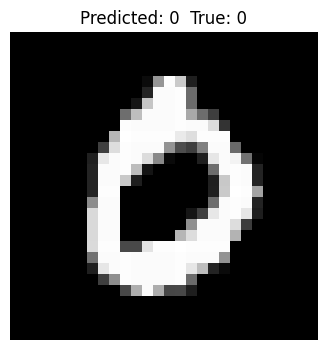

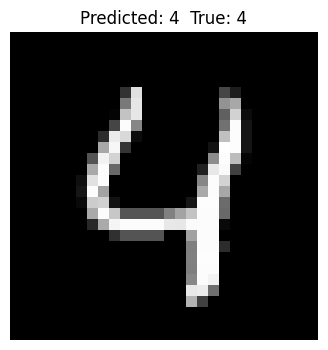

In [ ]:

# Visualization
for i in range(5):
    plt.figure(figsize=(4,4))
    plt.imshow(x_test[i], cmap="gray")
    plt.title(f"Predicted: {pred_labels[i]}  True: {y_test[i]}")
    plt.axis("off")
    plt.show()